In [1]:
%load_ext autoreload
%autoreload 2
import os
import torch
import unittest
import time
import copy
import numpy as np
from torch import optim
from torch.utils.data import DataLoader
from generic_utils import load_config
from model import FFTNet, FFTNetModel
from dataset import LJSpeechDataset

torch.manual_seed(1)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
MAX = 100
C = load_config('test_conf.json')
dataset = LJSpeechDataset(os.path.join(C.data_path, "mel/meta_fftnet_overfit.csv"), 
                          os.path.join(C.data_path, "mel/"), 
                          C.sample_rate,
                          C.num_mels, C.num_freq, 
                          C.min_level_db, C.frame_shift_ms,
                          C.frame_length_ms, C.preemphasis, C.ref_level_db,
                          11, C.min_wav_len, C.max_wav_len, False)
dataloader = DataLoader(dataset, batch_size=2,
                        shuffle=False, collate_fn=dataset.collate_fn,
                        drop_last=True, num_workers=2)

 > Reading LJSpeech from - /data/shared/KeithIto/LJSpeech-1.0/mel/
 | > Number of instances : 5
 | > Max wav length: 50000
 | > Min wav length: 0
 | > Receptive field: 2048
 | > Max wav length 170653
 | > Min wav length 66973
 | > Avg wav length 140291.4
 | > 0 instances are ignored by min_wav_len (0)


In [11]:
A = 5
c = 0
for data in dataloader:
    wav = data[0]
    mel = data[1]
    leng = data[2]
    target = data[3]
    c += 1
    print(c)
    if c == A:
        break

1
2


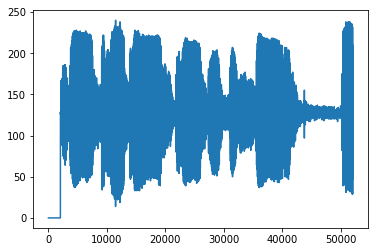

In [6]:
from matplotlib import pylab as plt
plt.plot(np.array(wav[0]))

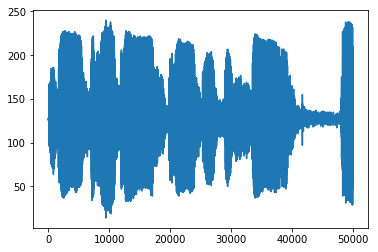

In [5]:
from matplotlib import pylab as plt
plt.plot(np.array(target[0]))

In [12]:
wav = wav.type_as(target)

In [17]:
abs(wav[0, dataset.receptive_field:] - target[0, :-1]).sum()

tensor(1.2721e+11)

In [ ]:
wav[0, dataset.receptive_field:] - target[0, :-1]

In [8]:
assert abs(wav[0, dataset.receptive_field:] - target[0]).sum() == 0

AssertionError: 

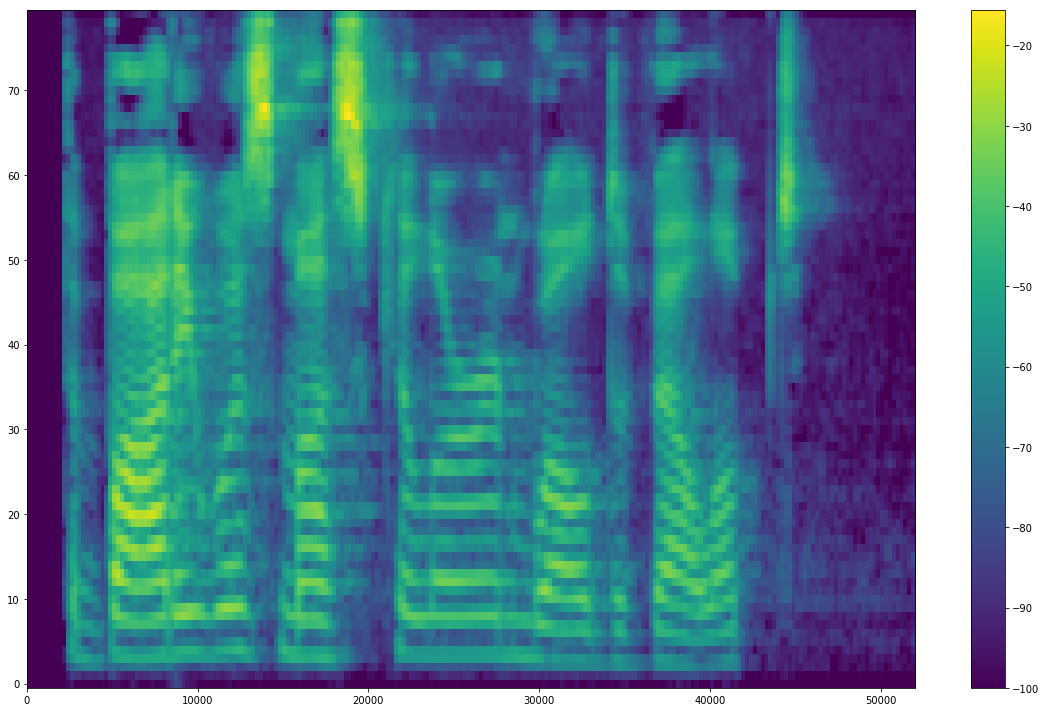

In [12]:
from visual import plot_spectrogram
plot_spectrogram(mel[1].numpy(), dataset.ap);